# TASK 4 - Exploratory Data Analysis-Terrorism

### Author - Prathmesh Mhatre

### GRIP @ The Sparks Foundation

### GRIPJANUARY23

### Problem Statement - It's required to find out the hot zone of terrorism.

In [31]:
# Importing the needed libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wg
wg.filterwarnings("ignore")

In [32]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1', low_memory=False)

In [33]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [34]:
df.shape

(181691, 135)

In [35]:
df.info(list)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

In [36]:

#selecting the needed dataset features  for the analysis
df2 = df[['eventid', 'iyear','country_txt', 'region_txt', 'latitude', 'longitude', 'provstate', 'city', 'crit1', 'crit2', 'crit3', 'success', 'suicide', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'natlty1_txt','gname', 'guncertain1', 'claimed', 'weaptype1_txt', 'nkill','nwound']]
#Renaming for further use
df2.rename(columns = {'eventid' : 'EventId', 'iyear' : 'Year','country_txt' : 'Country', 'region_txt' : 'Region', 'provstate' : 'Provstate', 'city' : 'City', 'crit1' : 'Crit1', 'crit2' : 'Crit2', 'crit3' : 'Crit3', 'success' : 'Success', 'suicide' : 'Suicide', 'attacktype1_txt' : 'AttackType', 'targtype1_txt' : 'TargType', 'targsubtype1_txt' : 'TargSubType', 'natlty1_txt' : 'Nationality', 'gname' : 'Group', 'guncertain1' : 'GunCertain1', 'claimed' : 'Claimed', 'weaptype1_txt' : 'WeaponType', 'nkill' : 'Killed','nwound' : 'Wounded'}, inplace = True)
df2.columns

Index(['EventId', 'Year', 'Country', 'Region', 'latitude', 'longitude',
       'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 'Success', 'Suicide',
       'AttackType', 'TargType', 'TargSubType', 'Nationality', 'Group',
       'GunCertain1', 'Claimed', 'WeaponType', 'Killed', 'Wounded'],
      dtype='object')

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   EventId      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Country      181691 non-null  object 
 3   Region       181691 non-null  object 
 4   latitude     177135 non-null  float64
 5   longitude    177134 non-null  float64
 6   Provstate    181270 non-null  object 
 7   City         181257 non-null  object 
 8   Crit1        181691 non-null  int64  
 9   Crit2        181691 non-null  int64  
 10  Crit3        181691 non-null  int64  
 11  Success      181691 non-null  int64  
 12  Suicide      181691 non-null  int64  
 13  AttackType   181691 non-null  object 
 14  TargType     181691 non-null  object 
 15  TargSubType  171318 non-null  object 
 16  Nationality  180132 non-null  object 
 17  Group        181691 non-null  object 
 18  GunCertain1  181311 non-

In [38]:
df2.shape

(181691, 23)

In [39]:
# Creating new feature "Casualities" by adding "Killed","Wounded" and "Suicide" features
df2['Casualities'] = df2['Killed'] +df2['Wounded'] + df2["Suicide"]

In [40]:
#checking for missing value
df2.isnull().sum()

EventId            0
Year               0
Country            0
Region             0
latitude        4556
longitude       4557
Provstate        421
City             434
Crit1              0
Crit2              0
Crit3              0
Success            0
Suicide            0
AttackType         0
TargType           0
TargSubType    10373
Nationality     1559
Group              0
GunCertain1      380
Claimed        66120
WeaponType         0
Killed         10313
Wounded        16311
Casualities    16874
dtype: int64

In [41]:
df2.head()

,EventId,Year,Country,Region,latitude,longitude,Provstate,City,Crit1,Crit2,...,TargType,TargSubType,Nationality,Group,GunCertain1,Claimed,WeaponType,Killed,Wounded,Casualities
0,197000000001,1970,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,NaN,Santo Domingo,1,1,...,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0,1.0
1,197000000002,1970,Mexico,North America,19.371887,-99.086624,Federal,Mexico city,1,1,...,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons...",Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,15.478598,120.599741,Tarlac,Unknown,1,1,...,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,0.0,NaN,Unknown,1.0,0.0,1.0
3,197001000002,1970,Greece,Western Europe,37.997490,23.762728,Attica,Athens,1,1,...,Government (Diplomatic),Embassy/Consulate,United States,Unknown,0.0,NaN,Explosives,NaN,NaN,NaN
4,197001000003,1970,Japan,East Asia,33.580412,130.396361,Fukouka,Fukouka,1,1,...,Government (Diplomatic),Embassy/Consulate,United States,Unknown,0.0,NaN,Incendiary,NaN,NaN,NaN


## Filling The Missing Value 

In [42]:
mean=df2["latitude"].mean()
df2["latitude"].fillna(mean, inplace=True)

In [43]:
mean=df2["longitude"].mean()
df2["longitude"].fillna(mean, inplace=True)

In [44]:
mean=df2["GunCertain1"].mean()
df2["GunCertain1"].fillna(mean, inplace=True)

In [45]:
mean=df2["Claimed"].mean()
df2["Claimed"].fillna(mean, inplace=True)

In [46]:
mean=df2["Killed"].mean()
df2["Killed"].fillna(mean, inplace=True)

In [47]:
mean=df2["Wounded"].mean()
df2["Wounded"].fillna(mean, inplace=True)

In [48]:
mean=df2["Casualities"].mean()
df2["Casualities"].fillna(mean, inplace=True)

In [49]:
df2.isnull().sum()

EventId            0
Year               0
Country            0
Region             0
latitude           0
longitude          0
Provstate        421
City             434
Crit1              0
Crit2              0
Crit3              0
Success            0
Suicide            0
AttackType         0
TargType           0
TargSubType    10373
Nationality     1559
Group              0
GunCertain1        0
Claimed            0
WeaponType         0
Killed             0
Wounded            0
Casualities        0
dtype: int64

In [50]:
#dropping row with NAN
df2=df2.dropna(axis=0)
df2.isnull().sum()

EventId        0
Year           0
Country        0
Region         0
latitude       0
longitude      0
Provstate      0
City           0
Crit1          0
Crit2          0
Crit3          0
Success        0
Suicide        0
AttackType     0
TargType       0
TargSubType    0
Nationality    0
Group          0
GunCertain1    0
Claimed        0
WeaponType     0
Killed         0
Wounded        0
Casualities    0
dtype: int64

In [51]:
df2.shape

(170011, 24)

In [52]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
EventId,170011.0,2.002616e+11,1.326883e+09,1.970000e+11,1.990121e+11,2.009013e+11,2.014072e+11,2.017123e+11
Year,170011.0,2.002550e+03,1.326871e+01,1.970000e+03,1.990000e+03,2.009000e+03,2.014000e+03,2.017000e+03
latitude,170011.0,2.332026e+01,1.842755e+01,-5.315461e+01,1.174464e+01,3.112402e+01,3.452132e+01,7.463355e+01
longitude,170011.0,-4.918417e+02,2.090248e+05,-8.618590e+07,-1.400410e-01,4.297707e+01,6.805167e+01,1.793667e+02
Crit1,170011.0,9.884772e-01,1.067243e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Crit2,170011.0,9.929063e-01,8.392485e-02,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Crit3,170011.0,8.681262e-01,3.383545e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Success,170011.0,9.067237e-01,2.908201e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Suicide,170011.0,3.573886e-02,1.856389e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
GunCertain1,170011.0,8.228396e-02,2.745205e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [53]:
#TOP 10 countries with the hight terrorism
Top10_country=df2['Country'].value_counts().head(10)
Top10_country

Iraq              22919
Pakistan          13246
Afghanistan       11711
India             11104
Colombia           7838
Philippines        6502
Peru               5864
El Salvador        5123
United Kingdom     4912
Turkey             4080
Name: Country, dtype: int64

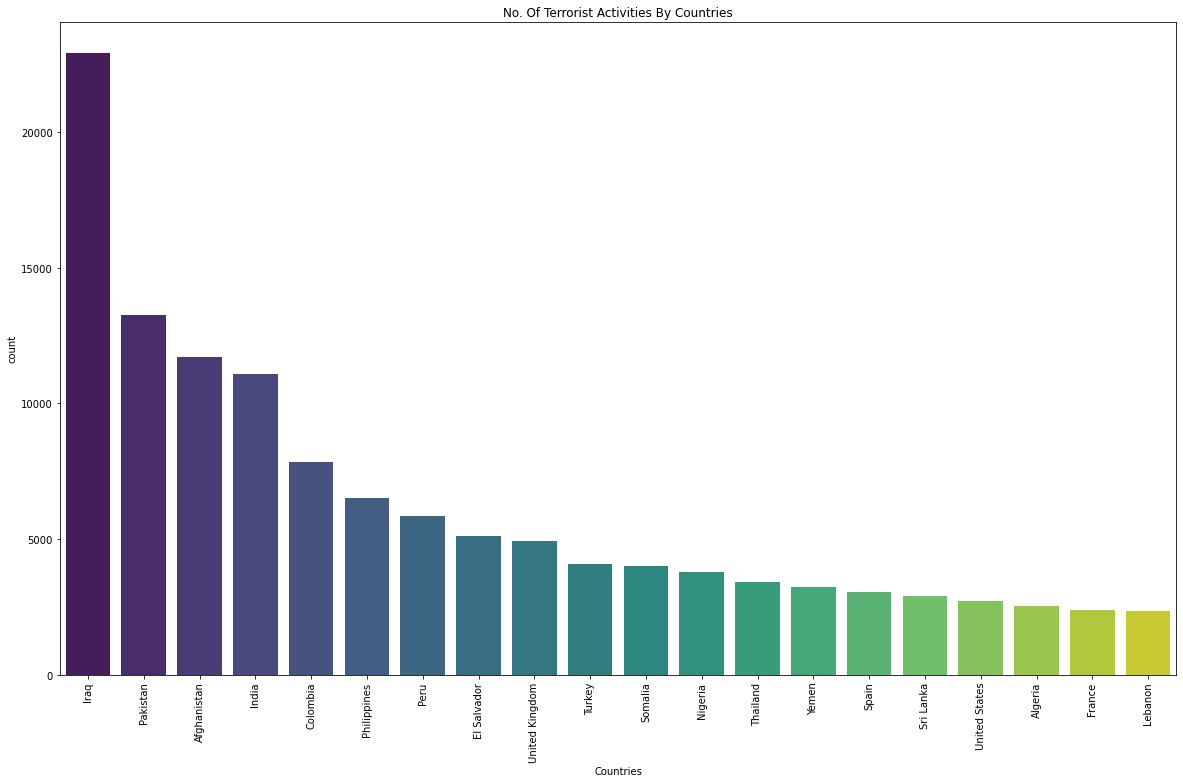

In [54]:
plt.subplots(figsize = (20,12))
sns.countplot('Country', data = df2, palette = 'viridis', order = df2['Country'].value_counts()[:20].index)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.title('No. Of Terrorist Activities By Countries')
plt.show()

In [55]:
#Bottom 10 countries with the low terrorism
B_country=df2['Country'].value_counts().tail(10)
B_country

Antigua and Barbuda    1
Falkland Islands       1
International          1
Wallis and Futuna      1
St. Lucia              1
Andorra                1
South Vietnam          1
Vanuatu                1
New Hebrides           1
Vatican City           1
Name: Country, dtype: int64

In [56]:
#TOP 10 Terrorist group
df2['Group'].value_counts().head(10)

Unknown                                             75831
Taliban                                              7096
Islamic State of Iraq and the Levant (ISIL)          5367
Shining Path (SL)                                    4389
Farabundo Marti National Liberation Front (FMLN)     3273
Al-Shabaab                                           3206
New People's Army (NPA)                              2657
Irish Republican Army (IRA)                          2550
Revolutionary Armed Forces of Colombia (FARC)        2360
Boko Haram                                           2328
Name: Group, dtype: int64

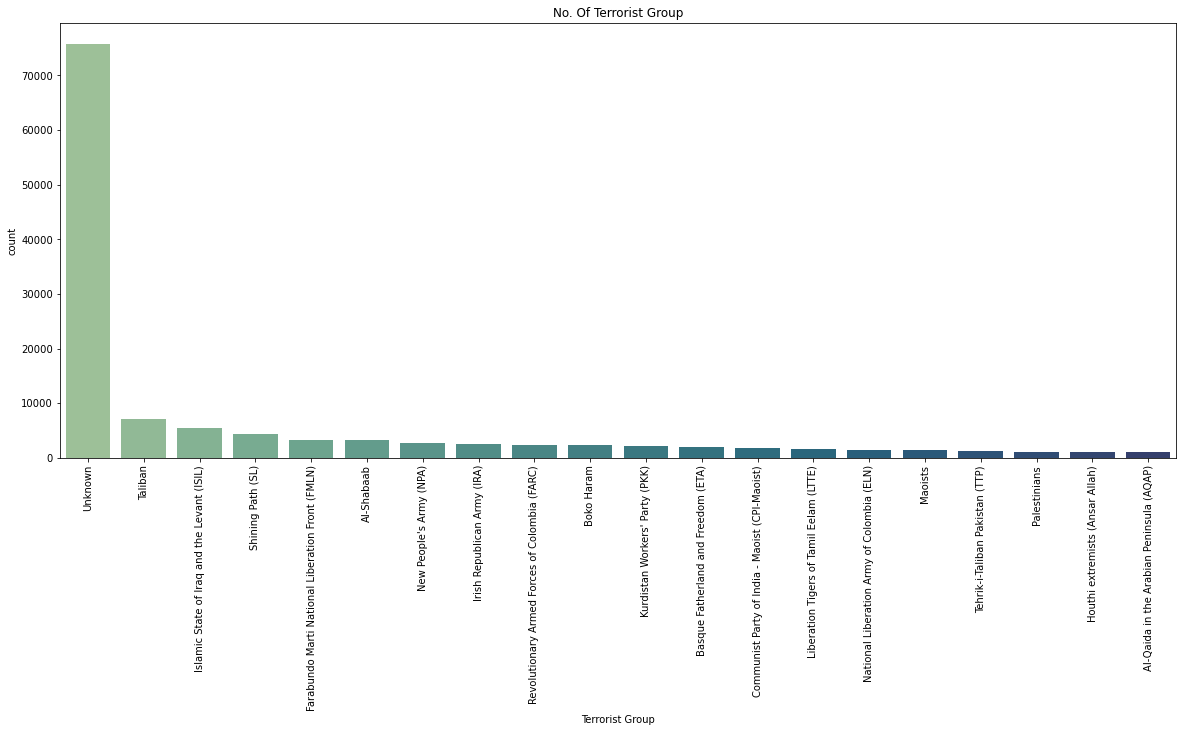

In [57]:
plt.subplots(figsize = (20,8))
sns.countplot('Group', data = df2, palette = 'crest', order = df2['Group'].value_counts()[:20].index)
plt.xticks(rotation = 90)
plt.xlabel('Terrorist Group')
plt.title('No. Of Terrorist Group')
plt.show()

In [58]:
#Types of Targets
df3= df2['TargType'].value_counts().head()
df3

Private Citizens & Property    42477
Military                       27765
Police                         24304
Government (General)           21035
Business                       17908
Name: TargType, dtype: int64

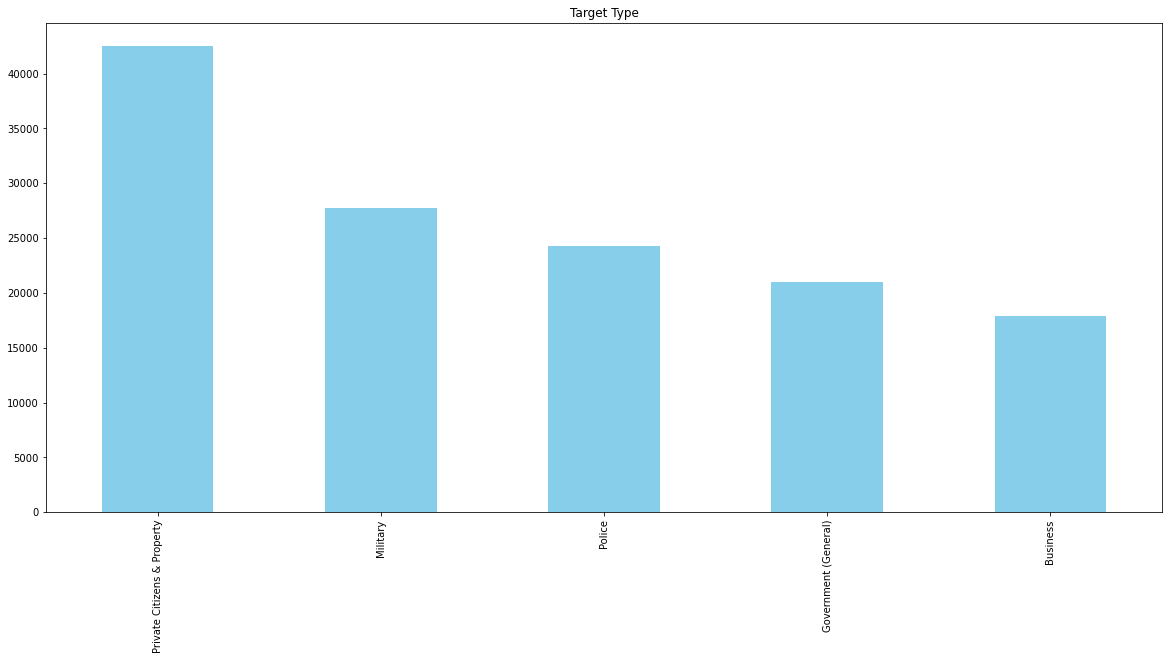

In [59]:
df3[0:10].plot.bar(color="skyblue");
fig = plt.gcf();
fig.set_size_inches(20, 9);
plt.title("Target Type");

In [61]:
#types of Attacks
count_att = df2['AttackType'].value_counts().head(10)
count_att

Bombing/Explosion                      80331
Armed Assault                          41400
Assassination                          18394
Hostage Taking (Kidnapping)            10483
Facility/Infrastructure Attack          9837
Unknown                                 7007
Unarmed Assault                          973
Hostage Taking (Barricade Incident)      970
Hijacking                                616
Name: AttackType, dtype: int64

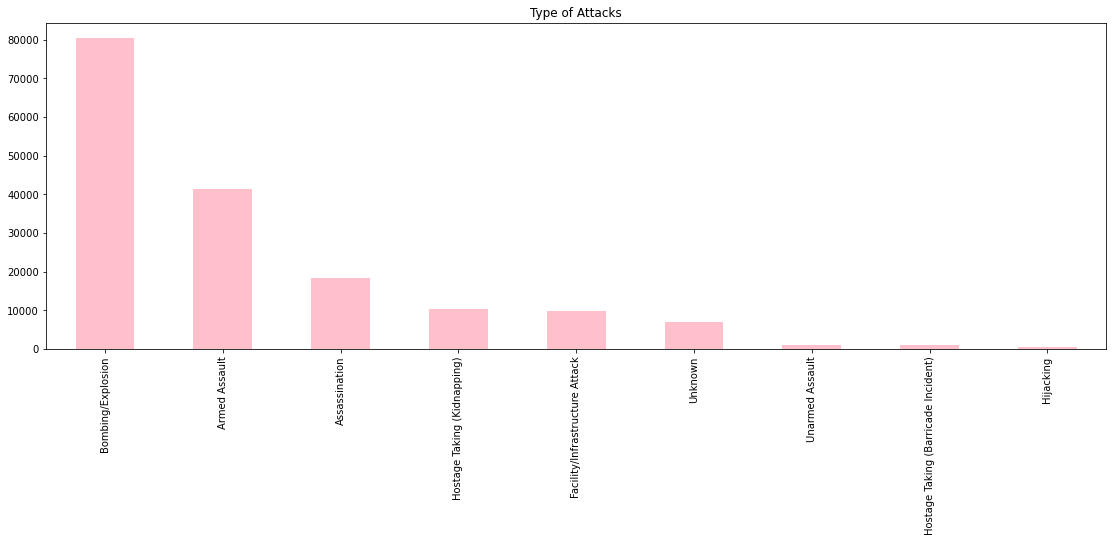

In [63]:
count_att[0:20].plot.bar(color="Pink");
fig = plt.gcf();
fig.set_size_inches(19, 6);
plt.title("Type of Attacks");

# CONCLUSION -

### 1.Country with Highest Terrorist Attacks: Iraq

### 2.Regions with Highest Terrorist Attacks: Middle East & North Africa

### 3.Maximum people killed in Attack : 1570.0 that took place in Iraq